In [1]:
## MP 573 Lecture 23: Summarizing the relationship between random variables
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal
import pywt as wt
from skimage.data import shepp_logan_phantom
import scipy.stats as stats

font = {'weight' : 'normal',
        'size'   : 18}

np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)


<style>
td {
  font-size: 50px
}
</style>

## Covariance and correlation coefficient

Given two jointly distributed random variables $X$ and $Y$, knowledge of the joint probability distribution (e.g., joint CDF, PDF, or CMF) provides complete information about how these random variables relate to each other. However, it is often of interest to calculate a more compressed measure of this relationship. The covariance $\sigma_{XY}$ provides such a measure, in order to describe the (potential) linear relationship between $X$ and $Y$:

$$ \sigma_{XY}  =  E[(X-\mu_X)(Y-\mu_Y)] =  E(XY) - \mu_X \mu_Y $$

The covariance $\sigma_{XY}$ describes how the two random variables tend to vary together. For example, if $X$ takes on large values (relative to its mean), does $Y$ also tend to take on large values? This relationship will be reflected by a  positive value of $\sigma_{XY}$. In contrast, we may have jointly distributed random variables such that when $X$ takes on large values,  $Y$ tends to take on small values. This relationship will be reflected in a negative value of $\sigma_{XY}$. Finally, we may have jointly distributed random variables such that whether $X$ takes on large or small values (relative to its mean) has no impact on whether $Y$ takes large or small values relative to its mean. This relationship will be reflected in $\sigma_{XY} = 0$

% Could add some images of joint PDFs that have positive, negative, and zero covariance

Note that the covariance can also be viewed as a generalization of the variance of a single random variable, i.e., $\sigma_{XX} = E[(X-\mu_X)^2] = \sigma_X^2$, where where $\sigma_X$ is the standard deviation of $X$ as covered in a recent lecture.

Importantly, the covariance $\sigma_{XY}$ is not a normalized quantity, i.e., $\sigma_{XY}$ has a scale that depends on the scales of $X$ and $Y$. Sometimes it is more helpful to provide a normalized measure of the relationship between two random variables. The (Pearson) correlation coefficient is one such measure:

$$\rho_{XY} = \frac{\sigma_{XY}}{\sigma_X \sigma_Y}$$

where $\rho_{XY} \in [-1,1]$ with $\rho_{XY}=1$ describing perfect positive correlation (i.e., higher values of $X$ indicate higher values of $Y$), and $\rho_{XY}=-1$ describing perfect negative correlation (i.e., higher values of $X$ indicate lower values of $Y$).

These two measures (covariance and Pearson correlation coefficient) provide important summarized descriptions of the linear relationship between two random variables. However, it is important to recognize that nonlinear relationships are not captured by these measures. In other words, it is possible for jointly distributed random variables to have intricate relationships that are undetected by the covariance and the Pearson correlation coefficient (e.g., with $\sigma_{XY} = \rho_{XY} = 0$). There are other kinds of correlation coefficients that are more sensitive to nonlinear relationships (e.g., Spearman's rank correlation coefficient, which is sensitive to monotonic, potentially nonlinear, relationships). 



### Example joint distribution (discrete) 


Suppose we have a basketball player shooting a pair of free-throws during a game. Let $X_1$ be the outcome of the first free-throw ($X_1 = 1$ if the player scores, and $X_1 = 0$ if the player misses), and similarly $X_2$ the outcome of the second. 

Further, suppose the player is not a great free-throw shooter, with $P(X_1 = 1) = 0.5$. Importantly, if the player scores the first one, they will gain some confidence and their probability of scoring the second one will be 0.8, i.e., $P(X_2 = 1 | X_1 = 1) = 0.8$. However, if the player misses the first one, they will lose confidence and their probability of scoring the second one will be only 0.2, i.e., $P(X_2 = 1 | X_1 = 0) = 0.2$.

Overall, therefore, the probabilities of each possible pair of events are:

| $X_1$ | $X_2$ | Probability |
| --- | --- | --- | 
| 0 | 0| 0.4 |
| 0 | 1| 0.1 |
| 1 | 0| 0.1 |
| 1 | 1| 0.4 |



Let us generate samples of this bivariate distribution.


Shot 1: Sample mean =       0.481
Shot 1: Sample mean =       0.494

Shot 1: Sample variance =       0.249639
Shot 2: Sample variance =       0.24996399999999994

Joint histogram
[[416.  90.]
 [103. 391.]]

 Estimated covariance matrix
[[0.24989 0.15354]
 [0.15354 0.25021]]

 Estimated correlation coefficient matrix
[[1.      0.61403]
 [0.61403 1.     ]]


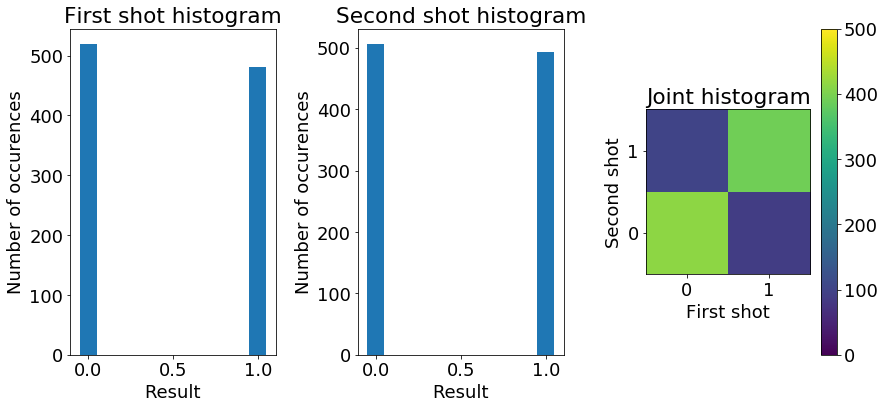

In [2]:
# Distribution parameter (first shot)
p1 = 0.5;
p2_score = 0.8;
p2_miss  = 0.2;

# Number of trials
N = 1000;
x1 = np.zeros((N))
x2 = np.zeros((N))

# Generate and show some data
for k in range(N):
    x1[k] = stats.bernoulli.rvs(p1, size=1)
    if x1[k] == 1:
        x2[k] = stats.bernoulli.rvs(p2_score, size=1)
    else:
        x2[k] = stats.bernoulli.rvs(p2_miss, size=1)

fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
plt.rc('font', **font)
plt.subplot(1,3,1) # Histogram of first shot
plt.title('First shot histogram')
_ = plt.hist(x1, bins=np.arange(-0.05,1.15,0.1))
plt.xlabel('Result');
plt.ylabel('Number of occurences');


plt.subplot(1,3,2) # Histogram of second shot
plt.title('Second shot histogram')
_ = plt.hist(x2, bins=np.arange(-0.05,1.15,0.1))
plt.xlabel('Result');
plt.ylabel('Number of occurences');


ax = plt.subplot(1,3,3) # Joint histogram
xedges = [-0.5, 0.5, 1.5]
yedges = [-0.5, 0.5, 1.5]
H, xedges, yedges = np.histogram2d(x1, x2,bins = (xedges,yedges))
H = H.T
plt.imshow(H, interpolation='nearest', origin='lower',vmin=0, vmax=N/2, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_xticks([0,1])
ax.set_yticks([0,1])
plt.xlabel('First shot')
plt.ylabel('Second shot')
plt.title('Joint histogram')
plt.colorbar()



# Calculate sample mean and variance
smean1 = np.mean(x1)
svar1 = np.var(x1)

smean2 = np.mean(x2)
svar2 = np.var(x2)

print('Shot 1: Sample mean =       ' + str(smean1))
print('Shot 1: Sample mean =       ' + str(smean2) + '\n')

print('Shot 1: Sample variance =       ' + str(svar1))
print('Shot 2: Sample variance =       ' + str(svar2) + '\n')


print('Joint histogram')
print(str(H))


# Calculate covariance and correlation coefficient
rv = np.zeros((2,N))
rv[0,:] = x1
rv[1,:] = x2
Cest = np.cov(rv)
print('\n Estimated covariance matrix')
print(str(Cest))


CCest = np.corrcoef(rv)
print('\n Estimated correlation coefficient matrix')
print(str(CCest))






### Example joint distribution (continuous)

Let us consider a pair of jointly distributed Gaussian random variables, with a given pair of means $\mathbf{\mu}$, and a given covariance matrix $\mathbf{C}$ (see below). This matrix contains the variance of each of our two Gaussians along the diagonal, and the covariance (next lecture) in the off-diagonal entries - note that this is by definition a hermitian symmetric matrix, ie: $\mathbf{C} = \mathbf{C}^T$. 


X1: Sample mean =       0.5064036225193578
X2: Sample mean =       -0.2011856867138476

X1: Sample variance =       2.016214982292443
X2: Sample variance =       1.5326705182774492


 True covariance matrix
[2.0, 1.0]
[1.0, 1.5]

 Estimated covariance matrix
[[2.01642 0.99752]
 [0.99752 1.53282]]

 Estimated correlation coefficient matrix
[[1.      0.56739]
 [0.56739 1.     ]]


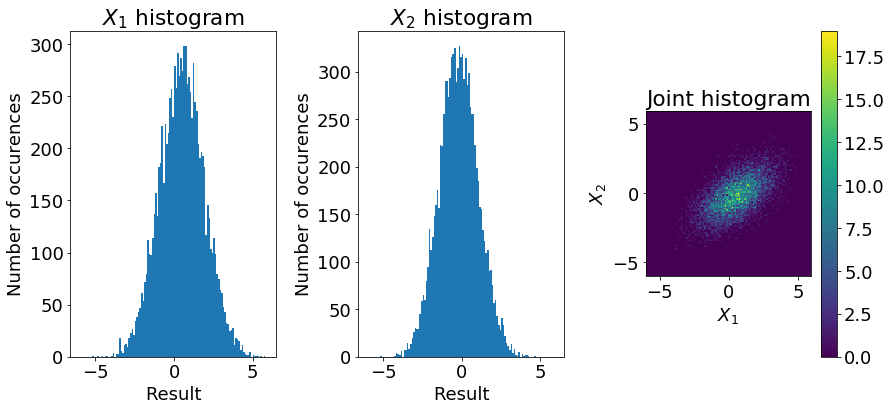

In [7]:
# Parameters
mu = [0.5, -0.2]
C = [[2.0, 1.0], [1.0, 1.5]]

# Number of trials
N = 10000;

# Generate random numbers
rv = stats.multivariate_normal.rvs(mu, C, size=N)

# Plot data
xvals = np.arange(-3*C[0][0],+3*C[0][0],0.1)
yvals = np.arange(-3*C[0][0],+3*C[0][0],0.1)

fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
plt.rc('font', **font)
plt.subplot(1,3,1) # Histogram of first shot
plt.title('$X_1$ histogram')
_ = plt.hist(rv[:,0], bins=xvals)
plt.xlabel('Result');
plt.ylabel('Number of occurences');


plt.subplot(1,3,2) # Histogram of second shot
plt.title('$X_2$ histogram')
_ = plt.hist(rv[:,1], bins=yvals)
plt.xlabel('Result');
plt.ylabel('Number of occurences');


ax = plt.subplot(1,3,3) # Joint histogram
H, xedges, yedges = np.histogram2d(rv[:,0], rv[:,1],bins = (xvals,yvals))
H = H.T
plt.imshow(H, interpolation='nearest', origin='lower',extent=[xvals[0], xvals[-1], yvals[0], yvals[-1]])
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Joint histogram')
plt.colorbar()


# Calculate sample mean and variance
smean1 = np.mean(rv[:,0])
svar1 = np.var(rv[:,0])

smean2 = np.mean(rv[:,1])
svar2 = np.var(rv[:,1])

print('X1: Sample mean =       ' + str(smean1))
print('X2: Sample mean =       ' + str(smean2) + '\n')

print('X1: Sample variance =       ' + str(svar1))
print('X2: Sample variance =       ' + str(svar2) + '\n')

# Calculate covariance and correlation coefficient
Cest = np.cov(rv.T)
print('\n True covariance matrix')
print(str(C[0][:]))
print(str(C[1][:]))



print('\n Estimated covariance matrix')
print(str(Cest))


CCest = np.corrcoef(rv.T)
print('\n Estimated correlation coefficient matrix')
print(str(CCest))



